# Transformações para Obter uma Distribuição Normal 🧠📊

## Objetivos 🎯

1. Entender a importância de transformar dados assimétricos.
2. Aplicar transformações logarítmicas para normalizar dados.
3. Aplicar transformações Box-Cox para alcançar normalidade.
4. Comparar as transformações e interpretar os resultados.

## Por que Normalizar os Dados? 🤔

Muitos testes estatísticos, como veremos, assumem que os dados seguem uma **distribuição normal** (em forma de sino). No entanto, em situações práticas, os dados podem ser **assimétricos** ou conter **outliers**, o que prejudica a aplicação de métodos tradicionais.

💡 Para contornar isso, utilizamos **transformações matemáticas** que tornam a distribuição mais simétrica e próxima da normal.


## Transformação Logarítmica 📝

A transformação logarítmica é uma técnica usada para reduzir a assimetria dos dados e tornar a distribuição mais próxima da normal.

A transformação logarítmica é muito útil quando os dados apresentam **assimetria à direita**, ou seja, caudas longas para valores altos.


Para um dado \( X \), a transformação logarítmica é dada por:

\[
Y = \log(X)
\]

* Logaritmo Natural (base
e): Usado para variáveis contínuas. Função: np.log(x)

* Logaritmo de Base 10: Usado para dados amplamente escalonados. Função: np.log10(x)

* Logaritmo de Base 2: Útil para dados binários ou que dobram de valor. Função: np.log2(x)

* Logaritmo com Deslocamento (log1p): Para evitar problemas com zeros. Função: np.log1p(x), equivalente a log(x + 1)

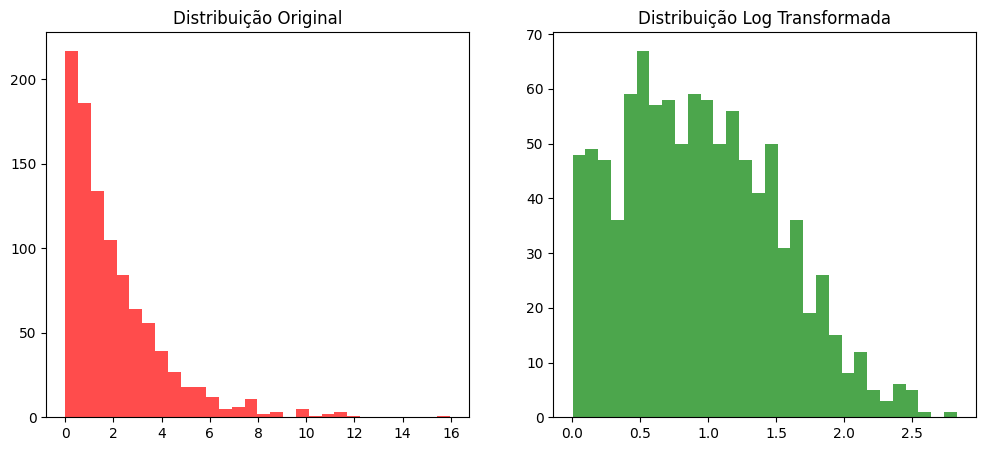

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Dados assimétricos (distribuição exponencial)
dados = np.random.exponential(scale=2, size=1000)

# Transformação logarítmica
log_dados = np.log1p(dados)

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(dados, bins=30, color='red', alpha=0.7)
axes[0].set_title('Distribuição Original')
axes[1].hist(log_dados, bins=30, color='green', alpha=0.7)
axes[1].set_title('Distribuição Log Transformada')
plt.show()

A melhor base para a transformação logarítmica depende dos seguintes critérios:

* Distribuição Resultante: A base que reduz mais a assimetria (valor de skew próximo de 0).

* Aplicabilidade: Verificar se os valores transformados mantêm sentido prático e interpretativo.

* Performance Estatística: A base que possibilita melhor ajuste aos testes estatísticos, como normalidade.

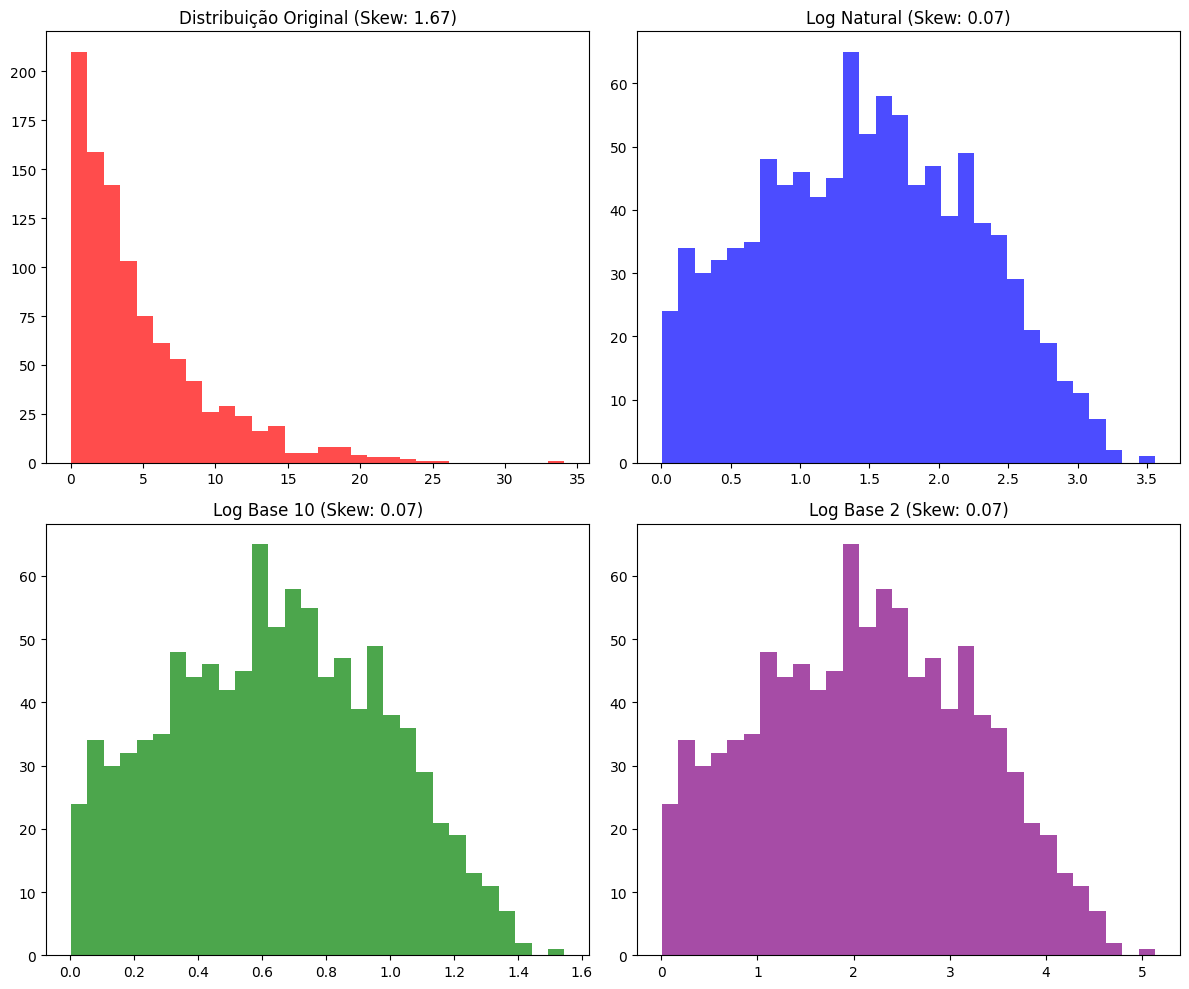

Assimetria Original: 1.67
Assimetria Log Natural: 0.07
Assimetria Log Base 10: 0.07
Assimetria Log Base 2: 0.07


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

# Geração de dados assimétricos (distribuição exponencial)
dados = np.random.exponential(scale=5, size=1000)

# Transformações com diferentes bases
log_natural = np.log1p(dados)  # log natural com ajuste
log_base10 = np.log10(dados + 1)  # log base 10
log_base2 = np.log2(dados + 1)  # log base 2

# Cálculo da assimetria (skewness)
skew_original = skew(dados)
skew_natural = skew(log_natural)
skew_base10 = skew(log_base10)
skew_base2 = skew(log_base2)

# Plotando as distribuições transformadas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(dados, bins=30, color='red', alpha=0.7)
axes[0, 0].set_title(f'Distribuição Original (Skew: {skew_original:.2f})')

axes[0, 1].hist(log_natural, bins=30, color='blue', alpha=0.7)
axes[0, 1].set_title(f'Log Natural (Skew: {skew_natural:.2f})')

axes[1, 0].hist(log_base10, bins=30, color='green', alpha=0.7)
axes[1, 0].set_title(f'Log Base 10 (Skew: {skew_base10:.2f})')

axes[1, 1].hist(log_base2, bins=30, color='purple', alpha=0.7)
axes[1, 1].set_title(f'Log Base 2 (Skew: {skew_base2:.2f})')

plt.tight_layout()
plt.show()

# Comparando as assimetrias
print(f'Assimetria Original: {skew_original:.2f}')
print(f'Assimetria Log Natural: {skew_natural:.2f}')
print(f'Assimetria Log Base 10: {skew_base10:.2f}')
print(f'Assimetria Log Base 2: {skew_base2:.2f}')


Skewness de -1 a 1 se aproxima de uma normal, convencionalmente.

* O gráfico mostra a redução da assimetria (skewness) com diferentes transformações.

* A melhor transformação é aquela que apresenta um valor de skew mais próximo de 0, indicando uma distribuição mais simétrica.

* A base logarítmica natural (ln) geralmente é a mais utilizada, mas a escolha depende da natureza dos dados e do contexto de análise.

No entanto, comparar apenas a assimetria (skew) não é suficiente para determinar se a transformação realmente aproximou a distribuição da normalidade.

Como veremos adiante, existem métodos mais robustos para verificar a normalidade:

* Gráfico QQ-Plot (Quantile-Quantile Plot): Mostra visualmente se os dados seguem uma distribuição normal, comparando os quantis dos dados com os quantis da normal teórica. Uma linha reta no QQ-Plot indica que os dados estão próximos da normalidade.

* Testes de Hipótese Estatística:

1. Teste de Shapiro-Wilk: Verifica a hipótese nula de que os dados seguem uma distribuição normal.

2. Teste de Anderson-Darling: Similar ao Shapiro-Wilk, mas mais sensível a desvios nas caudas.

3. Teste de Kolmogorov-Smirnov: Compara a distribuição empírica com a distribuição normal teórica.

## Transformação Box-Cox 🔧

A transformação Box-Cox é uma técnica flexível que busca reduzir a assimetria dos dados e torná-los mais próximos da normalidade. Ela faz isso testando diferentes valores do parâmetro lambda (λ) e aplicando a transformação que resulta na melhor simetria.

A transformação Box-Cox é uma técnica mais flexível que pode lidar com diferentes tipos de assimetria.

### Fórmula:
Para um dado \( X \) e parâmetro \( \lambda \):

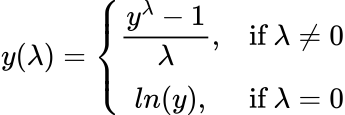

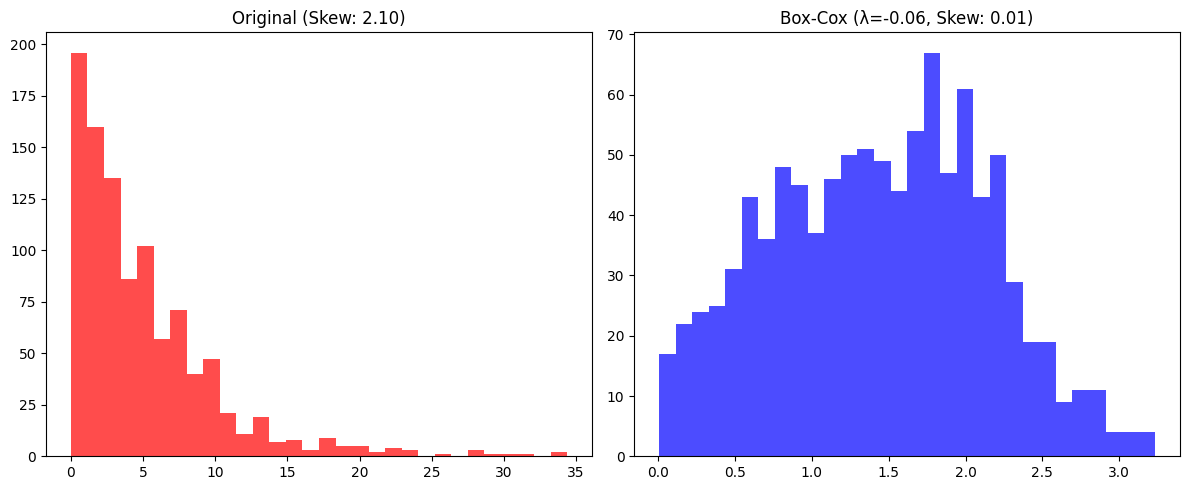

Melhor valor de λ: -0.06
Assimetria após Box-Cox: 0.01


In [ ]:
from scipy.stats import boxcox, skew, shapiro
import matplotlib.pyplot as plt

# Geração de dados assimétricos (distribuição exponencial)
dados = np.random.exponential(scale=5, size=1000)

# Aplicação da transformação Box-Cox
bcx_dados, lam = boxcox(dados + 1)  # Adicionando 1 para lidar com zeros

# Cálculo da assimetria (skewness) antes e depois
skew_original = skew(dados)
skew_bcx = skew(bcx_dados)


# Visualizando as distribuições transformadas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(dados, bins=30, color='red', alpha=0.7)
axes[0].set_title(f'Original (Skew: {skew_original:.2f})')

axes[1].hist(bcx_dados, bins=30, color='blue', alpha=0.7)
axes[1].set_title(f'Box-Cox (λ={lam:.2f}, Skew: {skew_bcx:.2f})')

plt.tight_layout()
plt.show()

# Resultados numéricos
print(f'Melhor valor de λ: {lam:.2f}')
print(f'Assimetria após Box-Cox: {skew_bcx:.2f}')


A escolha do melhor valor de λ é baseada em:

* Redução da Assimetria (Skewness): A transformação que resulta em um valor de skew mais próximo de 0 é a melhor.

* Teste de Normalidade: Usamos testes estatísticos (como Shapiro-Wilk) para verificar se a transformação foi eficaz.

* Máxima Verossimilhança: Alguns métodos, como o scipy.stats.boxcox, automaticamente encontram o λ que maximiza a verossimilhança dos dados.

Skewness de -1 a 1 se aproxima de uma normal, convencionalmente.

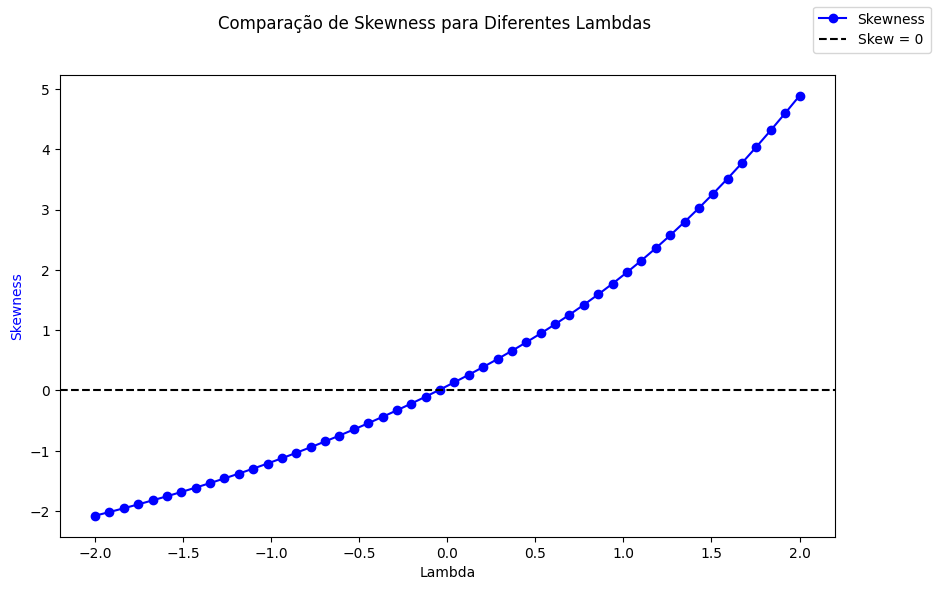

In [ ]:
# Testando vários valores de lambda manualmente
lambdas = np.linspace(-2, 2, 50)  # Intervalo de lambda [Geralmente se tenta de -5 a 5]
skewness_values = []  # Lista para armazenar os valores de skew
shapiro_pvalues = []  # Lista para armazenar os p-valores de Shapiro-Wilk

# Testando cada lambda
for lam in lambdas:
    if lam == 0:
        transformed = np.log(dados + 1)  # Transformação logarítmica para lambda = 0
    else:
        transformed = ((dados + 1) ** lam - 1) / lam  # Transformação Box-Cox

    # Calculando skewness e p-valor do teste de Shapiro-Wilk
    skewness = skew(transformed)

    skewness_values.append(skewness)

# Plotando os resultados
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(lambdas, skewness_values, label='Skewness', color='blue', marker='o')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Skewness', color='blue')
ax1.axhline(y=0, color='black', linestyle='--', label='Skew = 0')


fig.suptitle('Comparação de Skewness para Diferentes Lambdas')
fig.legend(loc="upper right")
plt.show()



Eixo Azul (Skewness):

A curva mostra que o valor de skew se aproxima de 0 em torno de λ = 0, indicando uma distribuição mais simétrica.

À medida que λ se afasta de 0, o valor de skew aumenta, indicando maior assimetria.

A transformação com λ próximo de 0 (logarítmica) é a que reduz mais a assimetria, embora não garanta a normalidade perfeita.

A assimetria mínima ocorre em torno de λ = 0.1.

Mesmo com a melhor transformação, os dados ainda não são perfeitamente normais, mas a simetria melhora significativamente.

## Comparação das Transformações 🧐



| Transformação | Vantagem | Desvantagem |
|--------------|---------|-------------|
| Logarítmica   | Simples e eficiente para assimetria à direita | Não funciona para valores negativos ou zero |
| Box-Cox       | Flexível para vários formatos | Requer dados positivos e não nulos |

As transformações são úteis para reduzir a assimetria, mas a normalidade pode não ser totalmente alcançada, especialmente para dados altamente assimétricos.

Mesmo que a transformações não garantam uma distribuição totalmente normal, podemos usar testes estatísticos para verificar a aproximação da normalidade e isso ser suficiente para o caso.